<a href="https://colab.research.google.com/github/Abel-kaiki/Modelling/blob/main/project_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries used in this project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Input
from keras.models import Model

#Colab drive mount
from google.colab import drive
drive.mount("/content/drive")

#Load dataset
path = '/content/drive/MyDrive/ColabNotebooks/Datasets/R_W_Wine_quality.csv'
data = pd.read_csv(path)
#data_qs = data['quality'].astype(int)
#data_qs.plot.hist()


Mounted at /content/drive


In [55]:
#Preparing dataframe - Splitting
# Separate inputs and outputs

#inputs = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'] #11 param
#inputs = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'alcohol'] #6 param
inputs = ['density', 'alcohol', 'pH'] #3 Param

data['Id'] = data.index
X = data[['Id'] + inputs] # include Id for tracking

#Need to convert 'type' to numerical (float OR binary)
data['type_int'] = (data['type'] == 'Red') #Red = True (1), White = False (0)
data['type_int'] = data['type_int'].astype(float)
data['quality'] = data['quality'].astype(float)

y = data[['quality','type_int']]
quality_min = min(data['quality'])
quality_max = max(data['quality'])
quality_range = quality_max - quality_min + 1 #Including min value

# Split data into training and testing sets, retaining IDs.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size : testing-training splits. 0.2 = 20% reserved for testing.


In [56]:
#Preparing df - Scaling
# fit and transform, scale between 1 and 0
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[inputs])
X_test_scaled = scaler.fit_transform(X_test[inputs])
num_classes = len(y.columns)

y_qual = y['quality'].values.reshape(-1, 1)
y_obj = scaler.fit(y_qual)

# y scaling (quality)
#y_train_scaled = scaler.transform(y_train)
#y_test_scaled = MinMaxScaler().transform(y_test)

#as dataframe
#y_train_scaled = pd.DataFrame(y_train_scaled, columns=['quality', 'type'])
#y_test_scaled = pd.DataFrame(y_test_scaled, columns=['quality', 'type'])

#y_train_scaled_nd = MinMaxScaler().fit_transform(y_train)
#y_test_scaled_nd = MinMaxScaler().fit_transform(y_test)

#num_classes

In [65]:
#Build model

#Sequential model cannot do multi-output, See: https://keras.io/guides/functional_api/#models-with-multiple-inputs-and-outputs
# In our case we need a softmax output for the quality, and a sigmoid output for the binary


model = Sequential([
    Dense(8, activation='sigmoid', input_shape=(len(inputs),)), #First hidden layer with 64 neurons, relu activation function
    Dense(8, activation='sigmoid'), # second hidden layer with 32 neurons
    Dense(1) #output layer for classification (softmax for multiclass, sigmoid for binary)
])

# Initialise layers
#input_layer = Input(shape=(len(inputs),))
#hidden = Dense(6, activation='relu')(input_layer)
#hidden = Dense(16, activation='relu')(hidden)
#output1 = Dense(1, activation='sigmoid')(hidden)
#output2 = Dense(1, activation='sigmoid')(hidden)

##
#model = Model(inputs=input_layer, outputs=[output1, output2]) #multi-output
#model = Sequential(inputs=input_layer, outputs=output1)

#Compiling
#sgd=SGD(lr=0.9) use this if you want to change lr in SGD
#Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0) use this if you want to change lr in Adam, default lr = 0.001
opti = Adam(learning_rate= 0.001)
#model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy','binary_crossentropy']) #multi-output
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.compile(optimizer = opti, loss='mae')

In [66]:
#Fitting model
model.fit(X_train_scaled, y_train['quality'].values, validation_split=0.2, batch_size = 30, epochs = 400)
#[print(i.shape, i.dtype) for i in model.inputs]



Epoch 1/400
139/139 [==============================] - 1s 3ms/step - loss: 5.4306 - val_loss: 4.8775
Epoch 2/400
139/139 [==============================] - 0s 2ms/step - loss: 4.3331 - val_loss: 3.7156
Epoch 3/400
139/139 [==============================] - 0s 2ms/step - loss: 3.1521 - val_loss: 2.5323
Epoch 4/400
139/139 [==============================] - 0s 2ms/step - loss: 1.9209 - val_loss: 1.2435
Epoch 5/400
139/139 [==============================] - 0s 2ms/step - loss: 0.9133 - val_loss: 0.7872
Epoch 6/400
139/139 [==============================] - 0s 2ms/step - loss: 0.7487 - val_loss: 0.6727
Epoch 7/400
139/139 [==============================] - 0s 3ms/step - loss: 0.6537 - val_loss: 0.6334
Epoch 8/400
139/139 [==============================] - 0s 3ms/step - loss: 0.6470 - val_loss: 0.6321
Epoch 9/400
139/139 [==============================] - 0s 3ms/step - loss: 0.6469 - val_loss: 0.6319
Epoch 10/400
139/139 [==============================] - 0s 3ms/step - loss: 0.6468 - val_lo

In [ ]:

[print(o.shape, o.dtype) for o in model.outputs]


(None, 10) <dtype: 'float32'>


[None]

In [ ]:

[print(l.name, l.input_shape, l.dtype) for l in model.layers]
gho = len(training_loss)
print(type(training_loss))

dense_5 (None, 11) float32
dense_6 (None, 6) float32
dense_7 (None, 3) float32


NameError: name 'training_loss' is not defined

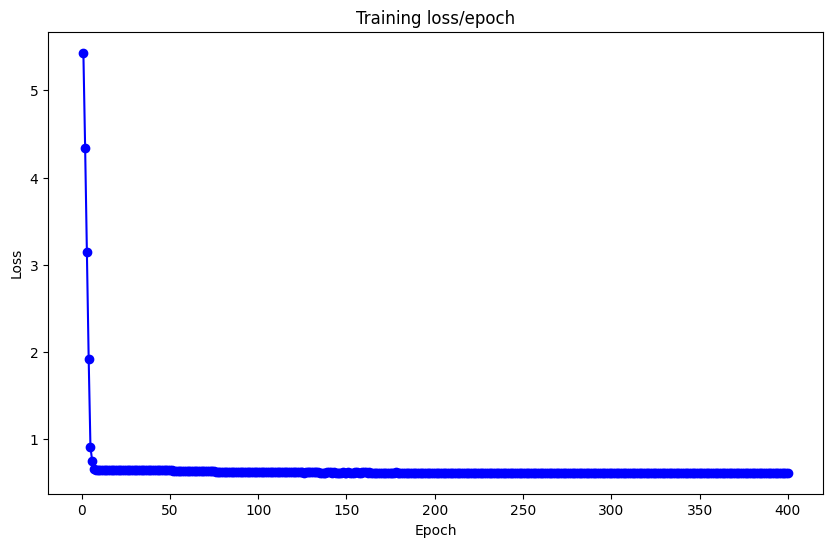

In [67]:
# Extract losses for training datasets
training_loss = model.history.history['loss']
epochs = range(1, len(training_loss) + 1)

# Plot training loss
plt.figure(figsize=(10,6))
plt.plot(epochs, training_loss, 'bo-', label='Training loss')
plt.title('Training loss/epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [68]:
#Evaluate model - Quality
#Use trained model to make predictions based on scaled test data
predictions = model.predict(X_test_scaled)
predictions_rounded = predictions.round(0)
#y_obj = MinMaxScaler().fit(y_test_scaled_nd[0].reshape(-1,1))
#predicted_quality = y_obj.inverse_transform(predictions)
# Quick min/max check
max(predictions_rounded)

41/41 [==============================] - 0s 1ms/step


array([6.], dtype=float32)

In [69]:
# Quick min/max check
print('max is:', max(predictions_rounded), ', min is:', min(predictions_rounded))

max is: [6.] , min is: [5.]


In [70]:
#transform numerical class indices back to original labels
#predicted_labels = LabelEncoder.inverse_transform(predicted_quality)

#Actual quality for test data
preds = predictions_rounded.flatten()
actual_quality = y_test['quality'].values

#Calculate accuracy
correct_predictions = (preds == actual_quality).sum()
accuracy = correct_predictions / len(actual_quality)
print(accuracy*100)

pred_range = preds - actual_quality
rmin = min(pred_range)
rmax = max(pred_range)

in_range = 100*((pred_range == 1).sum() + (pred_range == -1).sum())/(len(pred_range) - (pred_range == 0).sum())
in_range2 = (pred_range == 0).sum()/((pred_range == -1).sum() + (pred_range == 1).sum())
print(in_range, '% of erroneous predicted qualities are +-1 of actual quality')
print(in_range2, ': ratio between correct/incorrect by +-1')
print(min(training_loss))

50.69230769230769
85.17940717628706 % of erroneous predicted qualities are +-1 of actual quality
1.206959706959707 : ratio between correct/incorrect by +-1
0.6167070269584656


In [77]:
looking = pd.DataFrame(actual_quality)
looking.describe()

,0
count,1300.000000
mean,5.833846
std,0.859718
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000
